In [1]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [2]:
#1 Read in 9 years of Occupation Statistics for Focus State - Texas
#last year reported is 2018, (2010 - 2018)
#Input Data from BLS (Buruer of Labor Statistics on Occupation Types, Employee Counts)\
#Read from csv file

#2  Combine all years data for analysis

years = np.arange(2010, 2019,1)
state_code = "TX"
years_df = pd.DataFrame()

for year in years:
    data_in = pd.read_csv(os.path.join("..","Resources", f"state_M{year}_dl.csv"))
  
    data_save = data_in.loc[(data_in["OCC_CODE"].str.contains("15-")) & (data_in["ST"] == state_code), 
                                      ["YEAR" , "AREA", "ST", "STATE", "OCC_CODE", 
                                       "OCC_TITLE", "OCC_GROUP", "TOT_EMP"]].reset_index(drop=True)
    
    data_save.loc[:, "YEAR"] = year
  
    years_df = years_df.append(data_save, ignore_index=True)
    

C:\Users\geo_o\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [3]:
#3 Display Data for Cleaning

years_df.head(20)

,YEAR,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP
0,2010,48,TX,Texas,15-0000,Computer and Mathematical Occupations,major,"263,130"
1,2010,48,TX,Texas,15-1111,Computer and Information Research Scientists,NaN,"1,660"
2,2010,48,TX,Texas,15-1121,Computer Systems Analysts,NaN,"44,850"
3,2010,48,TX,Texas,15-1131,Computer Programmers,NaN,"27,620"
4,2010,48,TX,Texas,15-1132,"Software Developers, Applications",NaN,"34,810"
5,2010,48,TX,Texas,15-1133,"Software Developers, Systems Software",NaN,"33,630"
6,2010,48,TX,Texas,15-1141,Database Administrators,NaN,"9,180"
7,2010,48,TX,Texas,15-1142,Network and Computer Systems Administrators*,NaN,"27,380"
8,2010,48,TX,Texas,15-1150,Computer Support Specialists,NaN,"49,260"
9,2010,48,TX,Texas,15-1179,"Information Security Analysts, Web Developers,...",NaN,"18,080"


In [4]:
#4 Clean Data for field Total Employee count field for use

#convert null data represented by "**' to zeros

years_df.loc[years_df["TOT_EMP"] == '**', "TOT_EMP"] = "0"

#convert Total column to integer
years_df['TOT_EMP'] = years_df['TOT_EMP'].str.replace(',', '').astype(int)

#clean data
years_df["OCC_TITLE"] = years_df["OCC_TITLE"].str.replace("Occupations", "", case = False) 
years_df["OCC_TITLE"] = years_df["OCC_TITLE"].str.replace("cccupations", "", case = False) 

In [5]:
#5 Display Data after Cleaning

years_df.head(20)

,YEAR,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP
0,2010,48,TX,Texas,15-0000,Computer and Mathematical,major,263130
1,2010,48,TX,Texas,15-1111,Computer and Information Research Scientists,NaN,1660
2,2010,48,TX,Texas,15-1121,Computer Systems Analysts,NaN,44850
3,2010,48,TX,Texas,15-1131,Computer Programmers,NaN,27620
4,2010,48,TX,Texas,15-1132,"Software Developers, Applications",NaN,34810
5,2010,48,TX,Texas,15-1133,"Software Developers, Systems Software",NaN,33630
6,2010,48,TX,Texas,15-1141,Database Administrators,NaN,9180
7,2010,48,TX,Texas,15-1142,Network and Computer Systems Administrators*,NaN,27380
8,2010,48,TX,Texas,15-1150,Computer Support Specialists,NaN,49260
9,2010,48,TX,Texas,15-1179,"Information Security Analysts, Web Developers,...",NaN,18080


In [6]:
#6 Output File (CSV)
years_path = os.path.join("..","Resources","input_years_df.csv")

#Save cities data fram to csv file
years_df.to_csv (years_path, index = None, header=True)


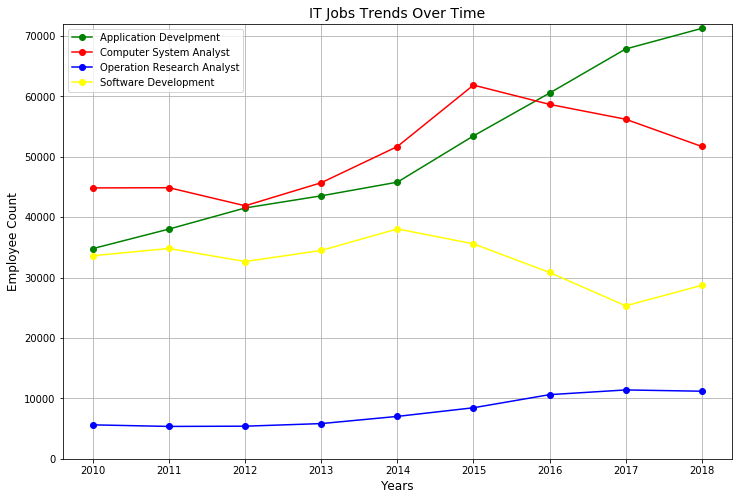

In [17]:
#Plot Major IT and Data Job Types

plt.figure(figsize=(12,8))
#x_axis is time
x_time = years
# # x_time

#y_axis are different drugs
y_major = years_df.loc[years_df["OCC_CODE"] == "15-0000", "TOT_EMP"]

y_appdev = years_df.loc[years_df["OCC_CODE"] == "15-1132", "TOT_EMP"]
y_companl = years_df.loc[years_df["OCC_CODE"] == "15-1121", "TOT_EMP"]
y_operanl = years_df.loc[years_df["OCC_CODE"] == "15-2031", "TOT_EMP"]
y_sfwdev = years_df.loc[years_df["OCC_CODE"] == "15-1133", "TOT_EMP"]

#plot parameters

plt.ylim(0, 72000)
plt.xticks(years)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Employee Count", fontsize=12)
plt.title("IT Jobs Trends Over Time", fontsize=14)

#job1_handle, = plt.plot(x_time, y_major, marker="o", color="black", label="Computer Major Group")
j1_handle, = plt.plot(x_time, y_appdev, marker="o", color="green", label="Application Develpment")
j2_handle, = plt.plot(x_time, y_companl, marker="o", color="red", label="Computer System Analyst")
j3_handle, = plt.plot(x_time, y_operanl, marker="o", color="blue", label="Operation Research Analyst")
j4_handle, = plt.plot(x_time, y_sfwdev, marker="o", color="yellow", label="Software Development")


plt.legend(handles=[j1_handle, j2_handle, j3_handle, j4_handle], loc="best")
plt.grid()#(axis='y')

# Save the Figure
plt.savefig("../output_charts/YearlyComparison.png", bbox_inches = "tight")